<a href="https://colab.research.google.com/github/vitormunnizz/audio_for/blob/main/audios_FOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random
import soundfile as sf

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/amostra_FOR/fake'

In [ ]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file1.wav', 'file10.wav', 'file11.wav', 'file12.wav', 'file13.wav', 'file14.wav', 'file15.wav', 'file16.wav', 'file17.wav', 'file18.wav', 'file19.wav', 'file2.wav', 'file20.wav', 'file21.wav', 'file22.wav', 'file24.wav', 'file23.wav', 'file25.wav', 'file26.wav', 'file27.wav', 'file28.wav', 'file3.wav', 'file31.wav', 'file29.wav', 'file30.wav', 'file32.wav', 'file36.wav', 'file33.wav', 'file35.wav', 'file34.wav', 'file37.wav', 'file4.wav', 'file40.wav', 'file41.wav', 'file39.wav', 'file38.wav', 'file42.wav', 'file45.wav', 'file44.wav', 'file43.wav', 'file48.wav', 'file47.wav', 'file49.wav', 'file46.wav', 'file50.wav', 'file5.wav', 'file6.wav', 'file7.wav', 'file8.wav', 'file9.wav']
['file10.wav', 'file1.wav', 'file2.wav', 'file3.wav', 'file4.wav', 'file5.wav', 'file6.wav', 'file7.wav', 'file8.wav', 'file9.wav', 'file3.mp3', 'file4.mp3', 'file5.mp3']


In [ ]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [ ]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [ ]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
2,-252.666443,105.530998,-10.210588,6.793674,6.091627,1.224402,-2.158858,-2.929596,-6.799842,-8.833406,-8.826536,-10.410686,-5.867927,0
3,-285.395569,117.825798,-19.771620,0.757276,-28.741615,-7.888129,-2.723614,-6.854291,-4.213655,-12.247496,9.878142,-14.730085,5.196804,0
4,-265.674805,60.197742,-6.170329,29.887024,3.726073,4.928080,-15.938187,-6.383635,-4.318545,-16.223585,-0.453411,-14.294041,2.433489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,-265.643036,81.611969,-0.051786,15.706508,-4.572192,6.268896,-13.187626,3.236949,-6.193376,2.356686,-19.276236,6.385146,-6.577495,1
59,-233.749893,88.799957,4.058630,29.731276,-32.859879,-4.284103,-8.235127,-26.561302,-16.221062,-4.010139,-15.090010,5.332997,-16.918034,1
60,-208.882553,83.241753,8.948306,45.209438,-17.337009,6.920979,-13.597802,-14.005617,-9.491747,-4.294306,-16.224607,5.685871,-7.490966,1
61,-247.579224,82.326363,8.928786,32.585125,-14.814745,2.343560,-6.796655,1.395951,-6.544800,3.866220,-15.022488,2.574661,-7.881528,1


In [ ]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.08
Coeficiente de Determinação (R²): 0.64


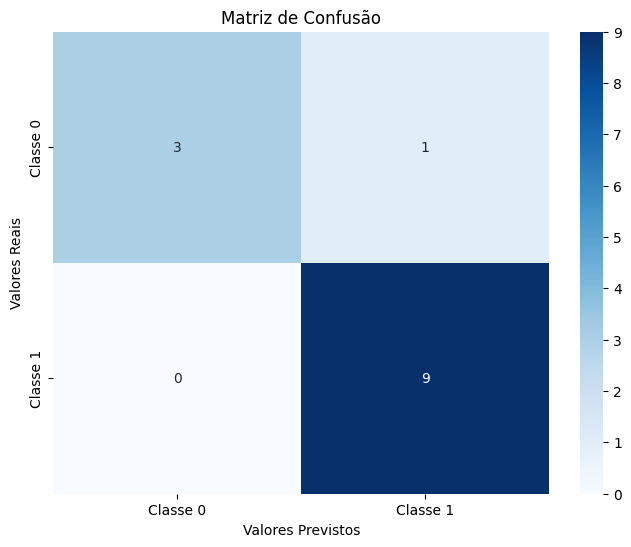

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()